# <font color='#3d59c6'>  CLASIFICACIÓN </font>


## <font color='#3d59c6'>  INTRODUCCIÓN </font>

Algoritmos de Aprendizaje supervisado
Clasificación, aplicados a índices macroeconómicos.

 **Estrategia**

* Modelado de Datos
* Análisis de Correlaciones
* Análisis de Componentes Principales
* Identificación de Variables para Modelos de clasificación
* Aplicación de algoritmos
* Conclusiones
* Optativo:Clasificación adicional

## <font color='#3d59c6'>  CARGA DE PACKAGES </font>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier



## <font color='#3d59c6'>  CARGA DE DATOS </font>

In [2]:
global_indicators = pd.read_csv("/content/Global Economy Indicators.csv")

global_indicators.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


## <font color='#3d59c6'>  LIMPIEZA DE DATOS </font>

In [3]:
global_indicators.columns

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [4]:

datos = global_indicators.copy()

# Eliminar las columnas especificadas
columnas_a_eliminar = [ ' AMA exchange rate ', ' IMF based exchange rate ', ' Currency ', ' Changes in inventories ',' Gross National Income(GNI) in USD ']
datos = datos.drop(columnas_a_eliminar, axis=1)


# Cambiar los nombres de las columnas a versiones más cortas
nuevos_nombres = {
    ' CountryID ': 'CountryID',
    ' Country ': 'Country',
    ' Year ': 'Year',
    ' Population ': 'Population',
    ' Per capita GNI ': 'pcGNI',
    ' Agriculture, hunting, forestry, fishing (ISIC A-B) ': 'Agriculture',
    ' Construction (ISIC F) ': 'Construction',
    ' Exports of goods and services ': 'Exports',
    ' Final consumption expenditure ': 'FinalConsumption',
    ' General government final consumption expenditure ': 'GovtConsumption',
    ' Gross capital formation ': 'GrossCapFormation',
    ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ': 'GrossFixedCapFormation',
    ' Household consumption expenditure (including Non-profit institutions serving households) ': 'HouseholdConsumption',
    ' Imports of goods and services ': 'Imports',
    ' Manufacturing (ISIC D) ': 'Manufacturing',
    ' Mining, Manufacturing, Utilities (ISIC C-E) ': 'Mining',
    ' Other Activities (ISIC J-P) ': 'OtherActivities',
    ' Total Value Added ': 'TotalValueAdded',
    ' Transport, storage and communication (ISIC I) ': 'Transport',
    ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ': 'Wholesale',
    ' Gross Domestic Product (GDP) ': 'GDP'

}

datos = datos.rename(columns=nuevos_nombres)

In [5]:
datos = datos[~datos['Country'].isin([' D.P.R. of Korea ', ' China, Macao SAR ', ' Sint Maarten (Dutch part) ', ' Monaco ',  ' Venezuela (Bolivarian Republic of) ', ' Tuvalu ' ])]


La preparación de los datos tiene los siguientes pasos.

Se eliminaron las variables:

*   Country ID no da información relevante a este modelo
*   ' AMA exchange rate ', ' IMF based exchange rate ', ' Currency ', no son variables que en principio pueden ser evaluadas per Cápita.
*   ' Changes in inventories 'tiene muchos valores nulos para muchos de los paises
*   ' Gross National Income(GNI) in USD ', esta variable ya está representada por GNI per capita e "ingresos"

Se eliminaron los paises a los que por su situación política o tamaño o naturaleza de actividad económica no tienen registros bien sea en agricultura o minería.

*   D.P.R. of Korea
*   Macao SAR
*   Sint Maarten (Dutch part)
*   Venezuela
*   Tuvalu



In [6]:
# Añadir la columna "ingresos" según la condición dada
datos['ingresos'] = datos['pcGNI'].apply(lambda x: 1 if x > 3995 else 0)

Para poder hacer un Análisis de Clasificación superviado se introduce una variable categórica que está directamente asociada al GNI per Cápita. El banco Mundial tiene umbrales en donde clasifica basado en el nivel de ingresos mensual per cápita. El Banco mundial hace 4 clasificaciones. Para poder hacer un análisis de regresión logística binomial, y para este ejemplo, se han tomado de esta forma:

*   Nivel de Ingresos Bajo [0]: GNI per cápita <3996
*   Nivel de Ingresos Alto[1]: GNI per cápita >3995

La nueva variable se añade al dataset con el nombre de "ingresos" y es de tipo booleano con 0 y 1 descrito anteriormente.


In [7]:
datos = datos.drop('pcGNI',axis=1)

Ahora que hemos convertido el GNI per capita en variable categórica, la eliminamos del dataset

In [8]:
datos.columns

Index(['CountryID', 'Country', 'Year', 'Population', 'Agriculture',
       'Construction', 'Exports', 'FinalConsumption', 'GovtConsumption',
       'GrossCapFormation', 'GrossFixedCapFormation', 'HouseholdConsumption',
       'Imports', 'Manufacturing', 'Mining', 'OtherActivities',
       'TotalValueAdded', 'Transport', 'Wholesale', 'GDP', 'ingresos'],
      dtype='object')


Se hace un análisis para el año 2019. Periodo económico justo antes de crisis debido a la pandemia.

Otra opción habría sido, clasificar el nivel de ingresos según el año. Ya que el umbral establecido por el banco mundial cambia año a año.

In [9]:
# Filtrar los datos desde 2010 hasta 2019
datos_filtrados = datos[(datos['Year'] >= 2019) & (datos['Year'] <= 2019)].copy()


## <font color='#3d59c6'>  DEFINICIÓN DE VARIABLES </font>

El modelo de clasificación se va a basar en la definición del Banco mundial de clasificación de los países según el nivel de ingresos para 2019/2020.

###Variable binaria:

**ingresos**: umbrales en donde clasifica basado en el nivel de ingresos mensual per cápita.
Nivel de Ingresos Bajo [0]: GNI per cápita <3996
Nivel de Ingresos Alto[1]: GNI per cápita >3995


###Variables Explicativas:

**Per Capita GNI:** **(Variable reemplazada por ingresos) **Ingreso Nacional Bruto (INB) per cápita. Medida del ingreso promedio de los residentes de un país.


**Agriculture, Hunting, Forestry, Fishing (ISIC A-B):** Actividad económica relacionada con la agricultura y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Construction (ISIC F):** Actividad económica relacionada con el sector de la construcción y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Exports of Goods and Services:** El valor total de los bienes y servicios que exporta un país.

**Final Consumption Expenditure:** Gasto total de los hogares, instituciones sin ánimo de lucro y el gobierno en bienes y servicios para consumo final.

**General Government Final Consumption Expenditure:** Gasto público en bienes y servicios para consumo final.

**Gross Capital Formation:** Comprende las adquisiciones de activos fijos menos las disposiciones realizadas por unidades institucionales

**Gross Fixed Capital Formation (Including Acquisitions Less Disposals of Valuables):** valor total de las inversiones en activos físicos, teniendo en cuenta las adquisiciones netas y las disposiciones de bienes valiosos realizadas durante un período determinado.

**Household Consumption Expenditure (Including Non-profit Institutions Serving Households):** Gasto, incluyendo el gasto imputado, realizado por hogares residentes en bienes y servicios de consumo individual.

**Imports of Goods and Services:** El valor total de bienes y servicios que un país importa.
**Manufacturing (ISIC D):** Actividad económica relacionada con el sector de la Manufactura y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Mining, Manufacturing, Utilities (ISIC C-E):** Actividad económica relacionada con el sector de la Minería, Manufactura servicios públicos y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Other Activities (ISIC J-P):** Actividades económicas no cubiertas por otras categorías específicas, según la CIIU.

**Total Value Added:** Es una medida de la contribución al PIB realizada por todos los productores, industrias y sectores individuales.

**Transport, Storage, and Communication (ISIC I):** Actividad económica relacionada con el sector del transporte, almacenamiento y comunicaciones y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Wholesale, Retail Trade, Restaurants, and Hotels (ISIC G-H):** Actividad económica relacionada con el sector del Comercio al por mayor y detal, restaurantes y hoteles y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Gross Domestic Product (GDP)**: Producción económica total del país.


## <font color='#3d59c6'>  ANÁLISIS DESCRIPTIVO </font>

### <font color='#3d59c6'>  Estadísticos </font>

In [10]:

indices = datos_filtrados.drop(['Country', 'Year'], axis=1).copy()


Dejamos las variables que nos van a dar información relevante. Country va a estar representado por countryID numerico y Year va a ser siempre 2019 que es el año de estudio

In [11]:
indices.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 49 to 10509
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CountryID               206 non-null    int64  
 1   Population              206 non-null    int64  
 2   Agriculture             206 non-null    float64
 3   Construction            206 non-null    float64
 4   Exports                 206 non-null    float64
 5   FinalConsumption        206 non-null    float64
 6   GovtConsumption         206 non-null    float64
 7   GrossCapFormation       206 non-null    float64
 8   GrossFixedCapFormation  206 non-null    float64
 9   HouseholdConsumption    206 non-null    float64
 10  Imports                 206 non-null    float64
 11  Manufacturing           206 non-null    float64
 12  Mining                  206 non-null    float64
 13  OtherActivities         206 non-null    float64
 14  TotalValueAdded         206 non-null   

In [12]:
indices.columns

Index(['CountryID', 'Population', 'Agriculture', 'Construction', 'Exports',
       'FinalConsumption', 'GovtConsumption', 'GrossCapFormation',
       'GrossFixedCapFormation', 'HouseholdConsumption', 'Imports',
       'Manufacturing', 'Mining', 'OtherActivities', 'TotalValueAdded',
       'Transport', 'Wholesale', 'GDP', 'ingresos'],
      dtype='object')

In [13]:
indices.isnull().sum()

CountryID                 0
Population                0
Agriculture               0
Construction              0
Exports                   0
FinalConsumption          0
GovtConsumption           0
GrossCapFormation         0
GrossFixedCapFormation    0
HouseholdConsumption      0
Imports                   0
Manufacturing             0
Mining                    0
OtherActivities           0
TotalValueAdded           0
Transport                 0
Wholesale                 0
GDP                       0
ingresos                  0
dtype: int64

Se observa que solo se tienen variables numéricas y sin Null values

In [14]:
indices.describe()

,CountryID,Population,Agriculture,Construction,Exports,FinalConsumption,GovtConsumption,GrossCapFormation,GrossFixedCapFormation,HouseholdConsumption,Imports,Manufacturing,Mining,OtherActivities,TotalValueAdded,Transport,Wholesale,GDP,ingresos
count,206.000000,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,206.000000
mean,427.936893,3.730089e+07,1.703677e+10,2.337902e+10,1.185012e+11,3.077263e+11,7.023048e+10,1.120220e+11,1.090852e+11,2.374260e+11,1.164339e+11,6.627825e+10,8.858911e+10,1.799122e+11,4.029851e+11,3.737432e+10,5.668009e+10,4.219412e+11,0.635922
std,251.915454,1.431387e+08,8.319744e+10,9.984950e+10,3.254085e+11,1.398579e+12,2.899682e+11,5.501511e+11,5.433188e+11,1.120488e+12,3.344389e+11,3.270049e+11,3.964713e+11,9.293726e+11,1.863334e+12,1.810049e+11,2.561686e+11,1.875875e+12,0.482343
min,4.000000,4.505000e+03,2.469190e+05,3.922222e+06,2.080148e+07,8.721741e+07,3.732852e+07,1.689037e+07,1.689037e+07,4.988889e+07,4.926630e+07,2.032974e+06,5.788889e+06,2.530834e+07,5.856667e+07,5.388889e+06,6.211111e+06,6.535185e+07,0.000000
25%,209.000000,1.303969e+06,3.699305e+08,2.841734e+08,2.220615e+09,5.059017e+09,9.765584e+08,1.488295e+09,1.284963e+09,3.919341e+09,3.398446e+09,4.406009e+08,1.078222e+09,1.895583e+09,5.627464e+09,4.936388e+08,8.698135e+08,6.107782e+09,0.000000
50%,427.000000,6.858228e+06,2.476993e+09,1.429997e+09,9.565934e+09,2.109585e+10,4.132909e+09,7.386664e+09,6.906912e+09,1.690874e+10,1.115254e+10,3.070959e+09,5.761372e+09,8.067714e+09,2.486545e+10,2.310711e+09,4.007719e+09,2.673893e+10,1.000000
75%,642.750000,2.567605e+07,7.584543e+09,1.172414e+10,6.715992e+10,1.542500e+11,3.147493e+10,4.732041e+10,4.432136e+10,1.127500e+11,6.653874e+10,2.087080e+10,4.616702e+10,6.310154e+10,1.817500e+11,1.828233e+10,2.423849e+10,1.992500e+11,1.000000
max,894.000000,1.421864e+09,1.070000e+12,1.020000e+12,2.640000e+12,1.740000e+13,3.010000e+12,6.180000e+12,6.120000e+12,1.440000e+13,3.120000e+12,3.820000e+12,4.510000e+12,1.190000e+13,2.140000e+13,2.250000e+12,3.120000e+12,2.140000e+13,1.000000


Se observa una alta desviación de los datos. Con valores por incluso superiores a la media.

### <font color='#3d59c6'>  Visualización Variable Categórica </font>

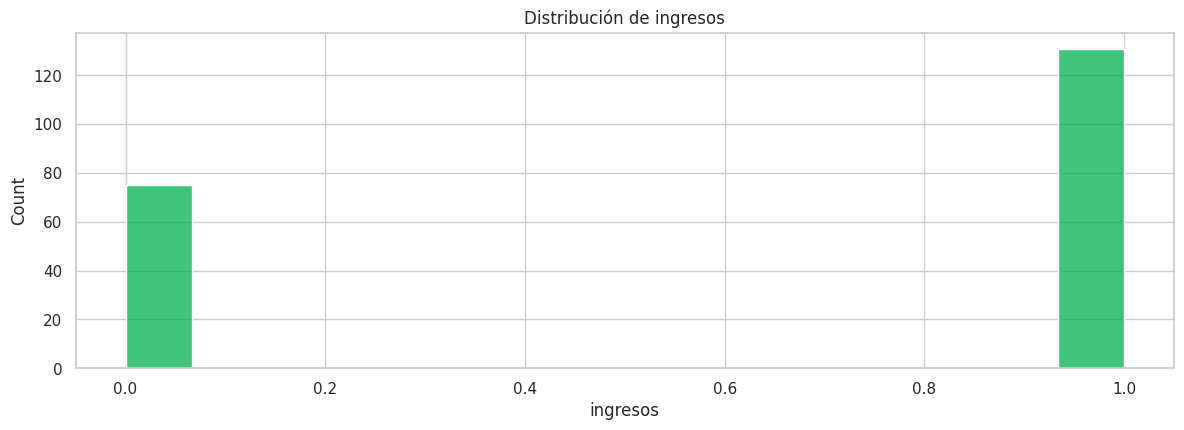

In [15]:
variable_seleccionada = 'ingresos'

# Configuración de estilo de seaborn
sns.set(style="whitegrid", palette="pastel")

# Crear figura con dos subgráficos apilados verticalmente
plt.figure(figsize=(12, 8))

# Subgráfico 1: Histograma
plt.subplot(2, 1, 1)
sns.histplot(indices[variable_seleccionada], bins=15, color="#00B050")
plt.title(f'Distribución de {variable_seleccionada}')


plt.tight_layout()
plt.show()


Visualmente se observa que la variable categórica parece estar equilibrada. Habría que comprobarlo numéricamente

In [16]:
# Resumen de la variable objetivo "ingresos"
class_summary = indices['ingresos'].value_counts(normalize=True) * 100
print(class_summary)


1    63.592233
0    36.407767
Name: ingresos, dtype: float64


Cercano al 60% / 40% ideal

### <font color='#3d59c6'>  Visualización Variables Explicativas </font>

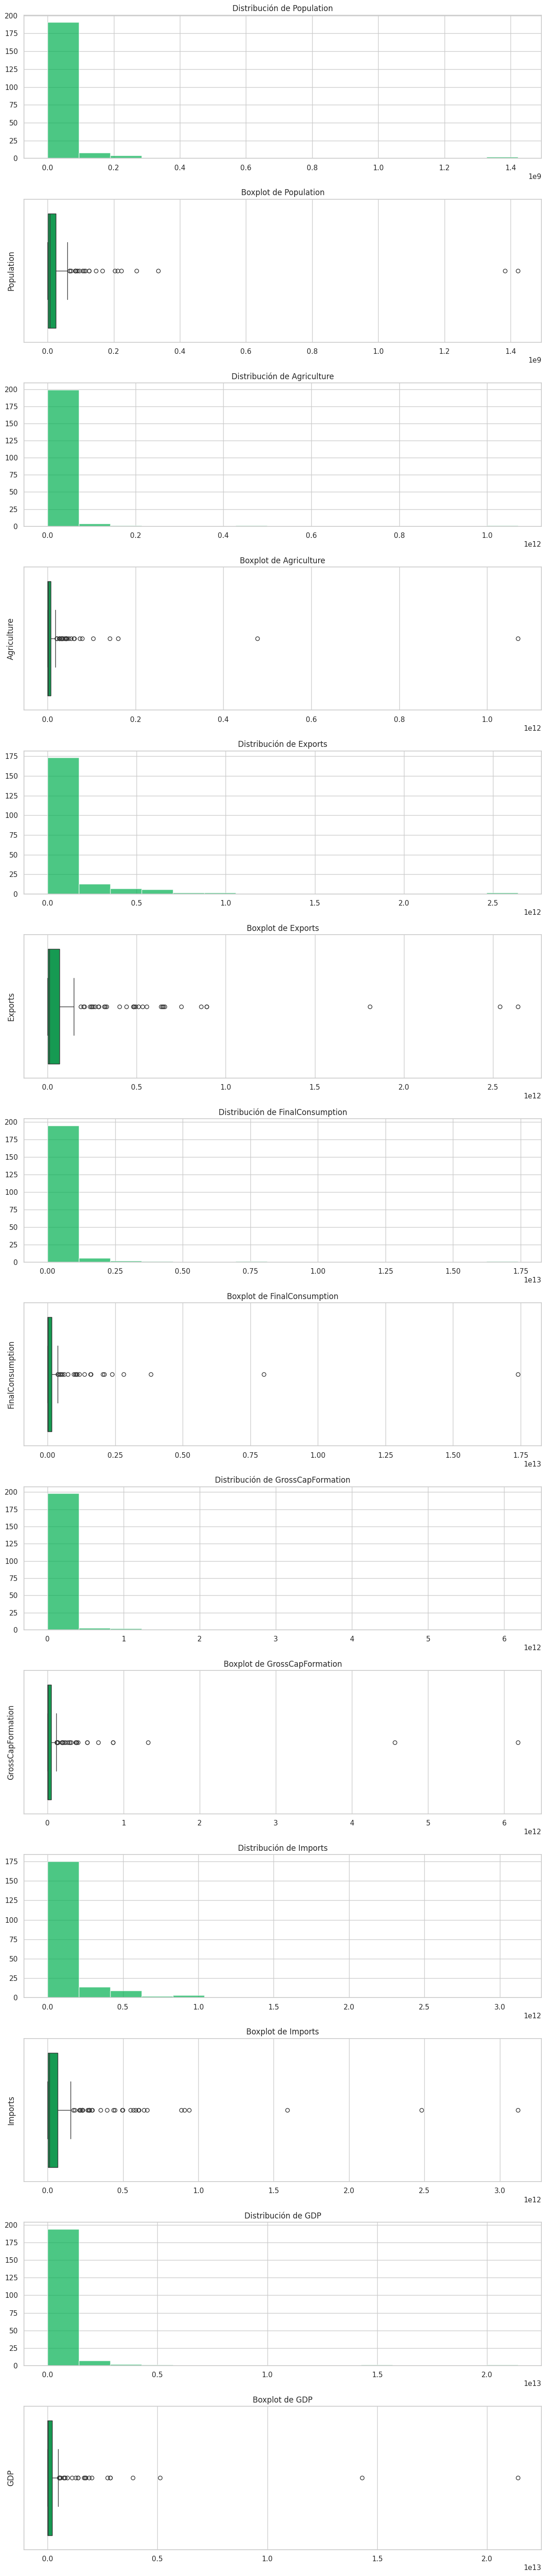

In [17]:
variables_seleccionadas = [
    #'CountryID',
    'Population',
    'Agriculture',
    #'Construction',
    'Exports',
    'FinalConsumption',
    #'GovtConsumption',
    'GrossCapFormation',
    #'GrossFixedCapFormation',
    #'HouseholdConsumption',
    'Imports',
    #'Manufacturing',
    #'Mining',
    #'OtherActivities',
    #'TotalValueAdded',
    #'Transport',
    # 'Wholesale',
    'GDP',
    # 'ingresos'
]

# Configuración de estilo de seaborn
sns.set(style="whitegrid", palette="pastel")

# Crear figura con subgráficos apilados verticalmente
fig, axes = plt.subplots(len(variables_seleccionadas) * 2, 1, figsize=(12, 8 * len(variables_seleccionadas)))

for i, variable in enumerate(variables_seleccionadas):
    # Histograma
    axes[i * 2].hist(indices[variable], bins=15, color="#00B050", alpha=0.7)
    axes[i * 2].set_title(f'Distribución de {variable}')

    # Boxplot
    sns.boxplot(x=indices[variable], color="#00B050", ax=axes[i * 2 + 1], orient='h')
    axes[i * 2 + 1].set_title(f'Boxplot de {variable}')
    axes[i * 2 + 1].set_xlabel('')
    axes[i * 2 + 1].set_ylabel(variable)

plt.tight_layout()
plt.show()

Las variables tienen ordenes de magnitud muy distintos, por lo que se debe proceder a normalizar los datos para poder hacer bien PCA y machine learning

### <font color='#3d59c6'>  Visualización Conjunta </font>

In [18]:

# fig = plt.figure(figsize=(10,10))
# variables_sel = [
    #'CountryID',
    #'Population',
    #'Agriculture',
    #'Construction',
    #'Exports',
    #'FinalConsumption',
    #'GovtConsumption',
    #'GrossCapFormation',
    #'GrossFixedCapFormation',
    #'HouseholdConsumption',
    #'Imports',
    #'Manufacturing',
    #'Mining',
    #'OtherActivities',
    #'TotalValueAdded',
    #'Transport',
    # 'Wholesale',
    #'GDP',
    # 'ingresos'
# ]

# sns.pairplot(data=indices[variables_sel + ['ingresos']], hue='ingresos')
# plt.show()


### <font color='#3d59c6'>  Correlación </font>

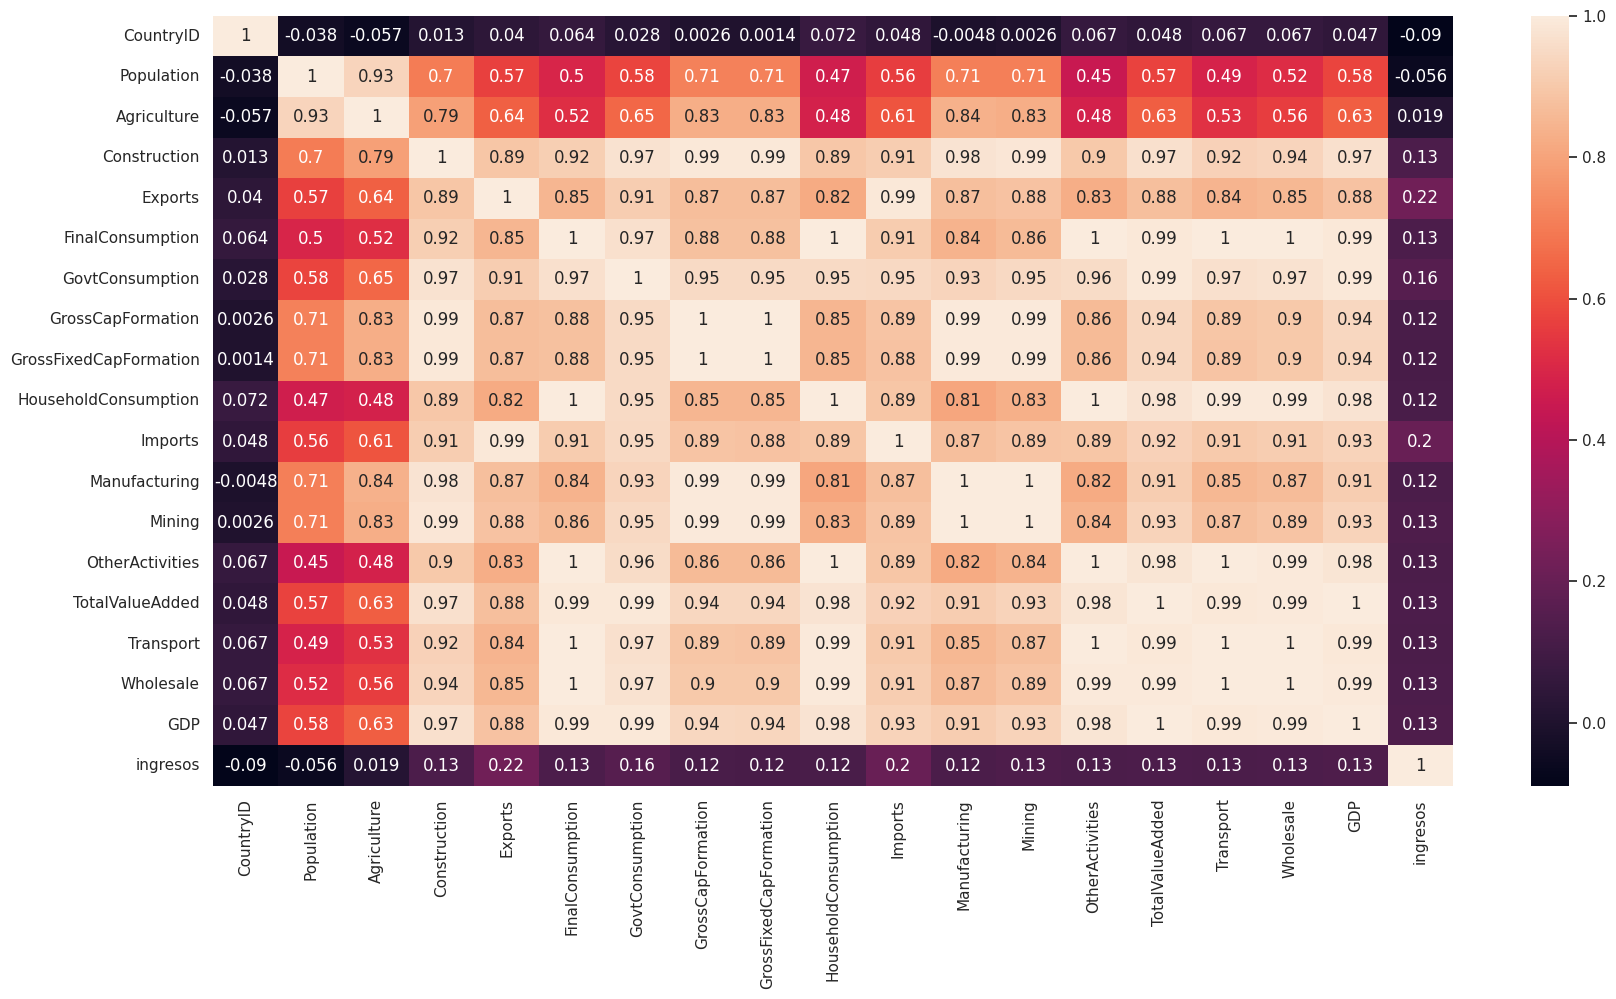

In [19]:
plt.figure(figsize = (20, 10))
sns.heatmap(indices.corr(), annot = True)
plt.show()

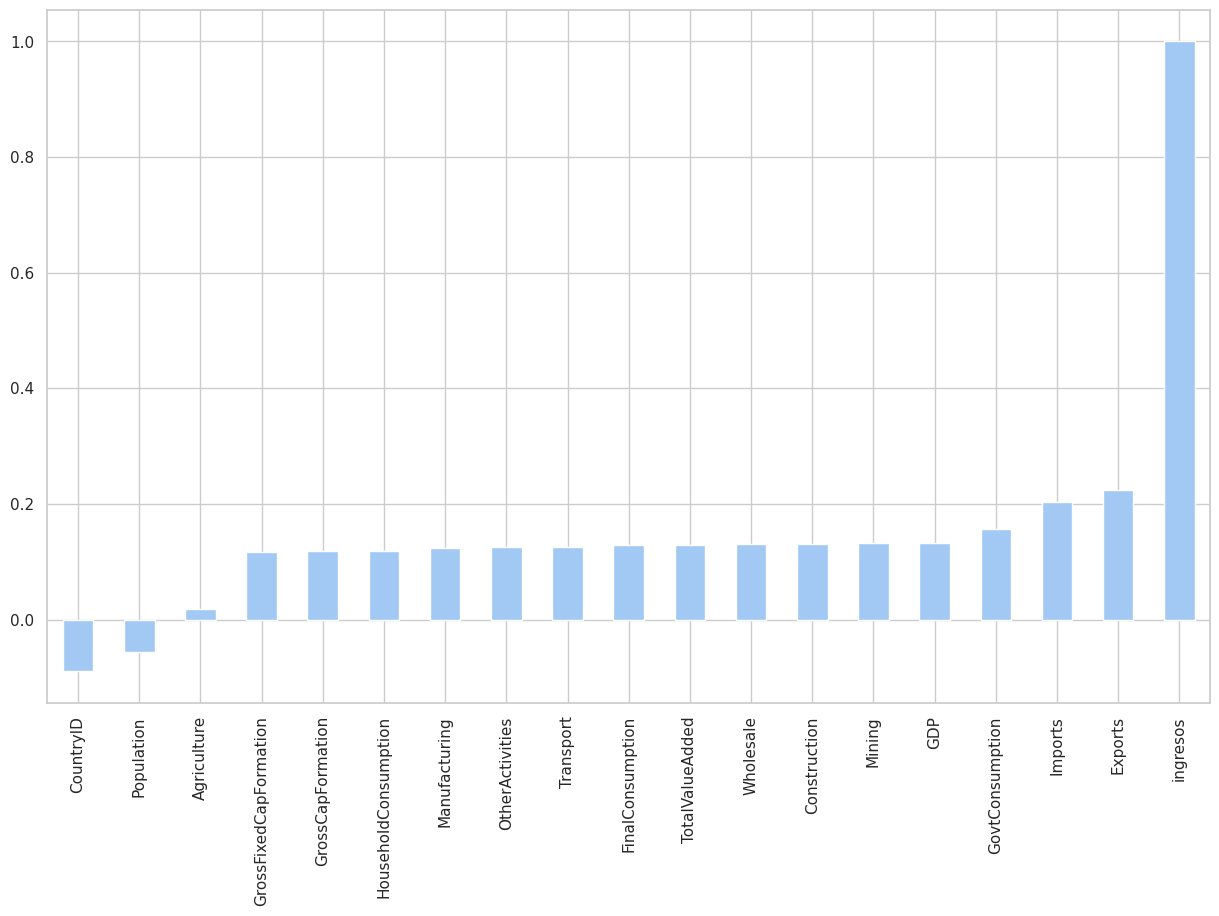

In [20]:
fig = plt.figure(figsize=(15,9))
indices.corr()['ingresos'].sort_values(ascending=True).plot(kind='bar')
plt.show()

Observamos que no hay una correlación muy alta de las variables con la categórica creada. Sin embargo, los índices macroeconómicos están áltamente correlacionados. Solo las variables población y agricultura, tienden a tener menor correlación con las otras variables.

In [21]:
# Calcular la matriz de correlación
correlation_matrix = indices.corr()

# Seleccionar solo la fila (o columna) de correlación con cada variable
correlation_with_variables = correlation_matrix['GDP']

# Ordenar los valores de mayor a menor
sorted_correlation = correlation_with_variables.abs().sort_values(ascending=False)

# Mostrar los valores de correlación ordenados
print(sorted_correlation)


GDP                       1.000000
TotalValueAdded           0.999613
Wholesale                 0.992661
GovtConsumption           0.990116
Transport                 0.989604
FinalConsumption          0.988260
OtherActivities           0.980277
HouseholdConsumption      0.977349
Construction              0.966670
GrossCapFormation         0.941012
GrossFixedCapFormation    0.939950
Imports                   0.931129
Mining                    0.928163
Manufacturing             0.911782
Exports                   0.884122
Agriculture               0.632515
Population                0.577396
ingresos                  0.133363
CountryID                 0.046629
Name: GDP, dtype: float64


Se observa una altisima correlación entre variables.

Para hacer el análisis PCA, vamos a tomar aquellas variables más correlacionadas y significativas:

*   Population
*   Agriculture (Tiene muy poca correlación con la variable objetivo, interesante ver como se comporta en los componentes de PCA)
*   Exports
*   Imports
*   FinalConsumption
*   TotalValueAdded
*   GDP

### <font color='#3d59c6'>  Escalabilidad de los datos </font>

In [22]:
from sklearn.preprocessing import StandardScaler

# Escalar todas las variables Excepto
variables_a_escalar = indices.drop(columns=['CountryID', 'ingresos'])

# Inicializa el escalador
scaler = StandardScaler()

# Aplica el escalado a las variables seleccionadas
indices_scaled = variables_a_escalar.apply(lambda x: scaler.fit_transform(x.values.reshape(-1, 1))[:, 0] if x.name not in ['CountryID', 'ingresos'] else x)

# Agrega las columnas 'countryID' e 'ingresos' al DataFrame escalado
indices_scaled[['CountryID', 'ingresos']] = indices[['CountryID', 'ingresos']]

# Visualiza las primeras 5 filas del DataFrame escalado
print(indices_scaled.head(5))


     Population  Agriculture  Construction   Exports  FinalConsumption  \
49     0.003282    -0.146567     -0.228847 -0.357945         -0.204323   
101   -0.241101    -0.171148     -0.221499 -0.350196         -0.210480   
153    0.037849     0.050042     -0.032802 -0.244863         -0.144588   
205   -0.260693    -0.205075     -0.232595 -0.361656         -0.218840   
257   -0.034647    -0.126313     -0.145618 -0.260581         -0.185683   

     GovtConsumption  GrossCapFormation  GrossFixedCapFormation  \
49         -0.226944          -0.200125               -0.197223   
101        -0.236749          -0.197658               -0.194924   
153        -0.133871          -0.064252               -0.079633   
205        -0.240733          -0.202919               -0.200099   
257        -0.218077          -0.177285               -0.176358   

     HouseholdConsumption   Imports  Manufacturing    Mining  OtherActivities  \
49              -0.196240 -0.324262      -0.199095 -0.218746        -0.

### <font color='#3d59c6'>  Análisis de Componentes PCA </font>

Para hacer el análisis de PCA, de las 16 variables que se tienen, vamos a seleccionar las variables que por conocimiento del dominio pueden explicar mejor la variable objetivo. Las variables seleccionadas son:

Variable Categórica: ingresos

Variables Explicativas:
*   Population
*   Agriculture
*   TotalValueAdded
*   FinalConsumption
*   Imports
*   Exports

Se ha sacado GDP del análisis ya que está sumamente relacionada con la variable categórica creada



In [23]:

# Seleccionar las columnas relevantes
indices_pca = indices_scaled[['Population', 'Agriculture','TotalValueAdded',
                        'FinalConsumption', 'Imports', 'Exports','ingresos']]

# Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(indices_pca)

# Obtener loadings (cargas)
loadings = pca.components_.T * (pca.explained_variance_ ** 0.5)

# Crear un DataFrame con los loadings
loadings_df = pd.DataFrame(data=loadings, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)],
                            index=indices_pca.columns)

# Obtener la varianza explicada por cada componente
variance_explained = pca.explained_variance_ratio_

# Crear un DataFrame con la varianza explicada
variance_df = pd.DataFrame(data=variance_explained, columns=['Variance Explained'],
                            index=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

print("\nVariance Explained:")
print(variance_df)
print("Loadings (Cargas):")
print(loadings_df)




Variance Explained:
     Variance Explained
PC1            0.757884
PC2            0.161413
PC3            0.042696
PC4            0.027025
PC5            0.010583
PC6            0.000299
PC7            0.000100
Loadings (Cargas):
                       PC1       PC2       PC3       PC4       PC5       PC6  \
Population        0.755091  0.634885  0.036964 -0.022666  0.172418  0.004541   
Agriculture       0.796619  0.579979 -0.054050 -0.035831 -0.172101 -0.007082   
TotalValueAdded   0.952787 -0.223940  0.166174 -0.123691 -0.059930  0.012256   
FinalConsumption  0.913588 -0.327368  0.208717 -0.133551  0.037281 -0.003512   
Imports           0.955073 -0.247635 -0.113430  0.128087  0.033009 -0.031525   
Exports           0.939172 -0.196576 -0.214403  0.193754 -0.003721  0.025401   
ingresos          0.066255 -0.118386 -0.364778 -0.283460  0.028926 -0.000044   

                       PC7  
Population       -0.002888  
Agriculture       0.005084  
TotalValueAdded  -0.016435  
FinalConsum

OBSERVACIONES: - En total tenemos 8 componentes (= número de variables)


• El componente 1 agrupa un 76% de variación, y los valores absolutos más elevados son: Imports, TotalValueAdded, Exports, FinalConsumption

• El componente 2 agrupa un 16% de la variación, y los valores absolutos más elevados son :
Population, Agriculture


### <font color='#3d59c6'>  Conclusiones procesado Inicial </font>

Al no tener una variable categórica que permita hacer la etiqueta, se ha creado una utilizando la definición de umbral de pobreza del Banco mundial. Para hacer una binomial, se han juntado los rangos medio-bajo y medio-alto y se les ha asignado un valor 0 y 1 respectivamente.

Se observa que luego de crear la variable categórica los datos están ligeramente desbalanceados. 63% - 37%. Es posible optar por modificar un poco el umbral del banco central o continuar con los datos así a ver qué tal se comportan con los algoritmos de clasificación.

Los índices macroeconómicos son muy diversos y cambiantes según el país o el periodo económico que se tome. Por esta razón se ha decidido tomar el valor de un año en concreto, 2019, justo antes de que la pandemia afecte de manera significativa a la economía de los países.

La visualización de las variables explicativas y la descripción estadística muestra que en los datos hay una alta presencia de outliers y que la desviación de los datos es demasiado alta. También muestra una gran diferencia entre valores mínimos y máximos de cada variable. Varios ordenes de magnitud. Esto nos sugiere que se debe hacer una normalización de los datos para que la magnitud del dato no sea determinante a la hora de entrenar el modelo.

En cuanto a la correlación, hay bastantes variables que tienen valores de correlación lineal bastante altos. Así que se hizo una selección de algunas variables que pareciera capturan la mayor de la información.

Se procede a realizar la estandarización del modelo utilizando la media y la desviación estándar.

Luego, se utilizan las variables más significativas y se procede a hacer un análisis de componentes, para observar qué componentes explican mejor la variabilidad de los datos. Observar las componentes más relevantes y que variables son las más significativas en cada componente. Esto nos permitirá llevarnos estas variables para los modelos de clasificación. Sobre todo, para el logístico el cual en teoría tiende a tener un mejor performance cuando el número de variables y ruido es acotado.

Las Componentes 1 y 2 capturan un 92% de la varianza total presente en los datos originales.
De esas componentes se identificaron las variables más relevantes y con las cuales se van a construir los modelos de clasificación:


*   Population
*   Agriculture
*   TotalValueAdded
*   Imports
*   Exports



## <font color='#3d59c6'>  MODELOS DE CLASIFICACIÓN </font>

### <font color='#3d59c6'>  Modelo de Regresión Logística Binomial </font>

#### <font color='#3d59c6'>  Variables </font>

In [24]:
# Seleccionar las variables de interés
variables_logistic = [

    'CountryID',
    'Population',
    'Agriculture',
    # 'Construction',
    'Exports',
    # 'FinalConsumption',
    #'GovtConsumption',
    # 'GrossCapFormation',
    # 'GrossFixedCapFormation',
    # 'HouseholdConsumption',
    'Imports',
    # 'Manufacturing',
    # 'Mining',
    # 'OtherActivities',
    'TotalValueAdded',
    # 'Transport',
    # 'Wholesale',
    # 'GDP',
    'ingresos',

]

# Crear el nuevo Dataset con las variables seleccionadas
indices_logistic = indices_scaled[variables_logistic].copy()



#### <font color='#3d59c6'>  Entrenamiento </font>

In [25]:
# from imblearn.combine import SMOTEENN


# # Balanceando los datos
# imp = SMOTEENN(sampling_strategy=0.99)
# X_bal, y_bal = imp.fit_resample(X, y)

# # Calcular el recuento de cada valor único en y_bal
# valores_unicos, recuento_valores = np.unique(y_bal, return_counts=True)

# # Calcular el porcentaje de cada clase en el conjunto de datos balanceado
# porcentaje_clases = (recuento_valores / len(y_bal)) * 100

# # Imprimir los resultados
# for valor, porcentaje in zip(valores_unicos, porcentaje_clases):
#     print(f"Clase {valor}: {porcentaje:.2f}%")
#     print("X_bal:", len(X_bal))
#     print("y_bal:", len(y_bal))

Se intentó balancear aún mas los datos de ingresos para ver si mejoraba el resultado, pero disminuyo el accuracy. No disminuye la cantidad de datos. Quizás los datos que se inventa introducen más ruido.

In [26]:
X = indices_logistic.drop(['ingresos', 'CountryID'], axis=1)
y = indices_logistic['ingresos'].values

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [28]:
X_train.head()

,Population,Agriculture,Exports,Imports,TotalValueAdded
9077,-0.253036,-0.200647,-0.358727,-0.343206,-0.214503
3794,-0.141427,-0.117758,-0.323179,-0.284448,-0.177825
8918,-0.188060,-0.203369,-0.362286,-0.345304,-0.214513
1581,-0.080667,-0.124961,-0.340790,-0.321018,-0.197236
653,0.897924,0.298979,-0.224074,-0.155382,-0.037113


In [29]:

model = LogisticRegression()
result = model.fit(X_train, y_train)

In [30]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.8064516129032258


#### <font color='#3d59c6'>  Evaluación </font>

In [31]:

np.set_printoptions(suppress=True)

# Obtener las probabilidades de predicción
probabilidades = model.predict_proba(X_test)

# Imprimir las probabilidades
print(probabilidades)

[[0.01649541 0.98350459]
 [0.08579731 0.91420269]
 [0.4175957  0.5824043 ]
 [0.41950245 0.58049755]
 [0.44619608 0.55380392]
 [0.44081488 0.55918512]
 [0.01410647 0.98589353]
 [0.48109014 0.51890986]
 [0.25518605 0.74481395]
 [0.11994073 0.88005927]
 [0.42350212 0.57649788]
 [0.43927458 0.56072542]
 [0.43530746 0.56469254]
 [0.58082618 0.41917382]
 [0.43977352 0.56022648]
 [0.36608717 0.63391283]
 [0.45709037 0.54290963]
 [0.07828385 0.92171615]
 [0.17376226 0.82623774]
 [0.46872476 0.53127524]
 [0.43932895 0.56067105]
 [0.07117584 0.92882416]
 [0.45202367 0.54797633]
 [0.4626048  0.5373952 ]
 [0.42681652 0.57318348]
 [0.43563184 0.56436816]
 [0.01548297 0.98451703]
 [0.46654142 0.53345858]
 [0.57865768 0.42134232]
 [0.64108552 0.35891448]
 [0.44998068 0.55001932]
 [0.45768972 0.54231028]
 [0.26252416 0.73747584]
 [0.4804736  0.5195264 ]
 [0.50352602 0.49647398]
 [0.00000019 0.99999981]
 [0.43503286 0.56496714]
 [0.44042197 0.55957803]
 [0.40930135 0.59069865]
 [0.27797616 0.72202384]


De los registros que hay en X_test, muestra la probabilidad con la que se está haciendo la predicción de que sea clasificado como 0 o 1. Se observa que en muchas ocaciones el valor esta mas cercano a 0.5 que a 1 o 0, lo que indica que el modelo no esta muy robusto.

In [32]:
 model.coef_

array([[-1.96216395, -0.22312226,  1.5261444 ,  1.29939314,  0.93660534]])

In [33]:
model.feature_names_in_

array(['Population', 'Agriculture', 'Exports', 'Imports',
       'TotalValueAdded'], dtype=object)

Axes(0.125,0.11;0.775x0.77)


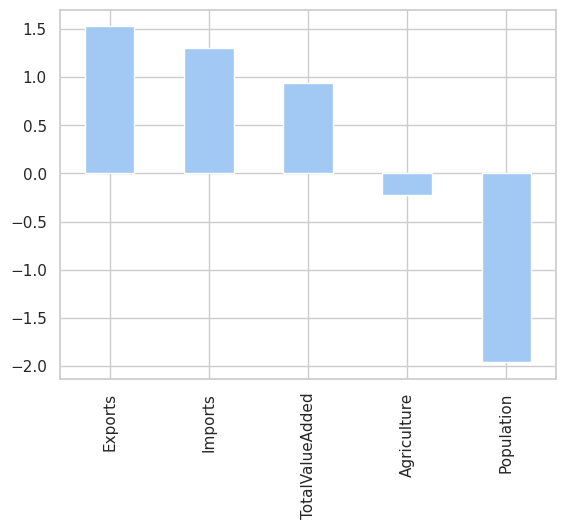

In [34]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:20].plot(kind='bar'))

Los coeficientes positivos de cada variable, indican la importancia de estas variables en la predicción de que sea clase 1, o de ingresos altos, y los negativos, los de ingresos bajos. Estos pesos de cada variable nos permite disminuir la cantidad de variables en el modelo, seleccionando aquellas más influyentes

Accuracy: 0.81

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.39      0.54        18
           1       0.80      0.98      0.88        44

    accuracy                           0.81        62
   macro avg       0.84      0.68      0.71        62
weighted avg       0.82      0.81      0.78        62



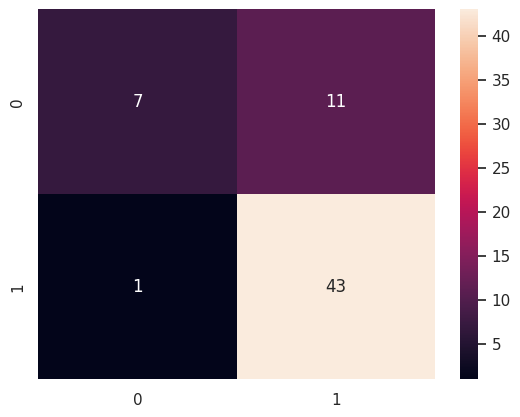

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, prediction_test)
conf_matrix = confusion_matrix(y_test, prediction_test)
classification_rep = classification_report(y_test, prediction_test)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot = True)
print("\nClassification Report:")
print(classification_rep)

#### <font color='#3d59c6'>  Conclusiones </font>

El modelo tiene un buen rendimiento identificando países de clase 1 (ingresos medio-altos y altos), pero no tiene buen rendimiento para distinguir entre países de ingresos bajos y medio-bajos y países de ingresos altos. Por esta razón tiene un alto número de falsos positivos. Jugando con las variables y el peso que tienen en cada clase, se observa que de todo el dataset, solo Population y agriculture tenían una influencia en la clasificación de países de bajos ingresos. Habría que enriquecer el modelo con nuevas variables más asociadas a países de ingresos bajos, como mortalidad infantil, esperanza de vida o tasa de desempleo.



### <font color='#3d59c6'>  Modelo de Arboles de Decisión </font>

#### <font color='#3d59c6'>  Variables </font>

In [36]:
# Seleccionar las variables de interés
variables_tree = [

     'CountryID',
     'Population',
    'Agriculture',
    'Construction',
    'Exports',
    'FinalConsumption',
     'GovtConsumption',
    'GrossCapFormation',
    'GrossFixedCapFormation',
    'HouseholdConsumption',
    'Imports',
    'Manufacturing',
    'Mining',
    'OtherActivities',
    'TotalValueAdded',
    'Transport',
    'Wholesale',
    'GDP',
    'ingresos'

]

# Crear el nuevo Dataset con las variables seleccionadas
indices_tree = indices_scaled[variables_tree].copy()

En principio, vamos a entregarle al Decision Tree todas las variables que tiene el modelo

#### <font color='#3d59c6'>  Entrenamiento </font>

In [37]:
X_tree = indices_tree.drop(['ingresos', 'CountryID'], axis=1)
y_tree = indices_tree['ingresos'].values

In [38]:
# Dividir en train y test
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree,y_tree,test_size=0.3,random_state=0)

In [39]:
#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=4, random_state = 0,max_leaf_nodes=50, min_samples_split=2, criterion='gini')

Estos son los parametros con los cuales se puede "jugar" para mejorar el nivel de clasificación del Decision Tree

In [40]:
#Entrenamiento
tree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, random_state=0)

In [41]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train_tree)
y_test_pred_tree = tree.predict(X_test_tree)

In [42]:
y_train_pred_tree

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

#### <font color='#3d59c6'>  Evaluación </font>

In [43]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train_tree, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test_tree, y_test_pred_tree)

print('El accuracy en train es:', train_accuracy_tree)
print('El accuracy en test es:', test_accuracy_tree)

El accuracy en train es: 0.9583333333333334
El accuracy en test es: 0.8709677419354839


Se tiene un accuracy de train y test similar. A medida que se aumenta la profundidad del arbol, mejora el accuracy.

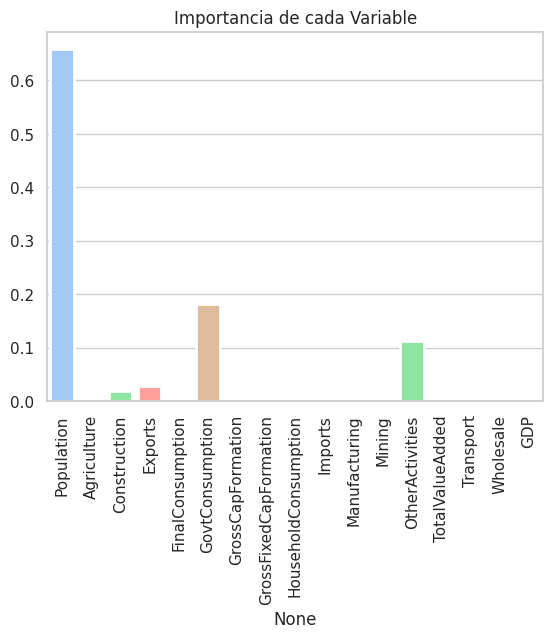

In [44]:
import seaborn as sns
importances = tree.feature_importances_
columns = X_tree.columns
# Crear un gráfico de barras de las importancias de las características
sns.barplot(x=columns, y=importances, hue=columns, palette='pastel', saturation=2.0, edgecolor='white', linewidth=2)
plt.title('Importancia de cada Variable')
plt.xticks(rotation=90)
plt.show()


Se observa que las variables más sigificativas en el Decision Tree para la clasificacion de la variable "ingresos" que son Population y GovtConsumption cuando se tiene una profundidad máxima de 2.

Sin embargo, a medida que aumenta la profundidad, más variables toman importancia en el modelo y aumenta el accuracy.



Test Set:
Accuracy: 0.87

Confusion Matrix:


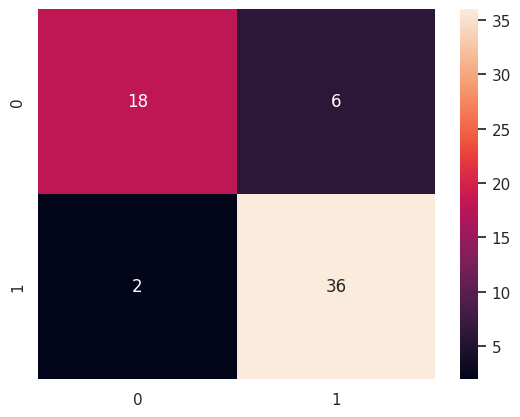


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.86      0.95      0.90        38

    accuracy                           0.87        62
   macro avg       0.88      0.85      0.86        62
weighted avg       0.87      0.87      0.87        62



In [45]:


# Evaluate the model

accuracy_test_tree = accuracy_score(y_test_tree, y_test_pred_tree)

conf_matrix_test_tree = confusion_matrix(y_test_tree, y_test_pred_tree)

classification_rep_test_tree = classification_report(y_test_tree, y_test_pred_tree)

# Print the results


print("\nTest Set:")
print(f"Accuracy: {accuracy_test_tree:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix_test_tree, annot=True, fmt='d')
plt.show()
print("\nClassification Report:")
print(classification_rep_test_tree)


In [46]:
!pip install pydot

In [47]:
import pydot


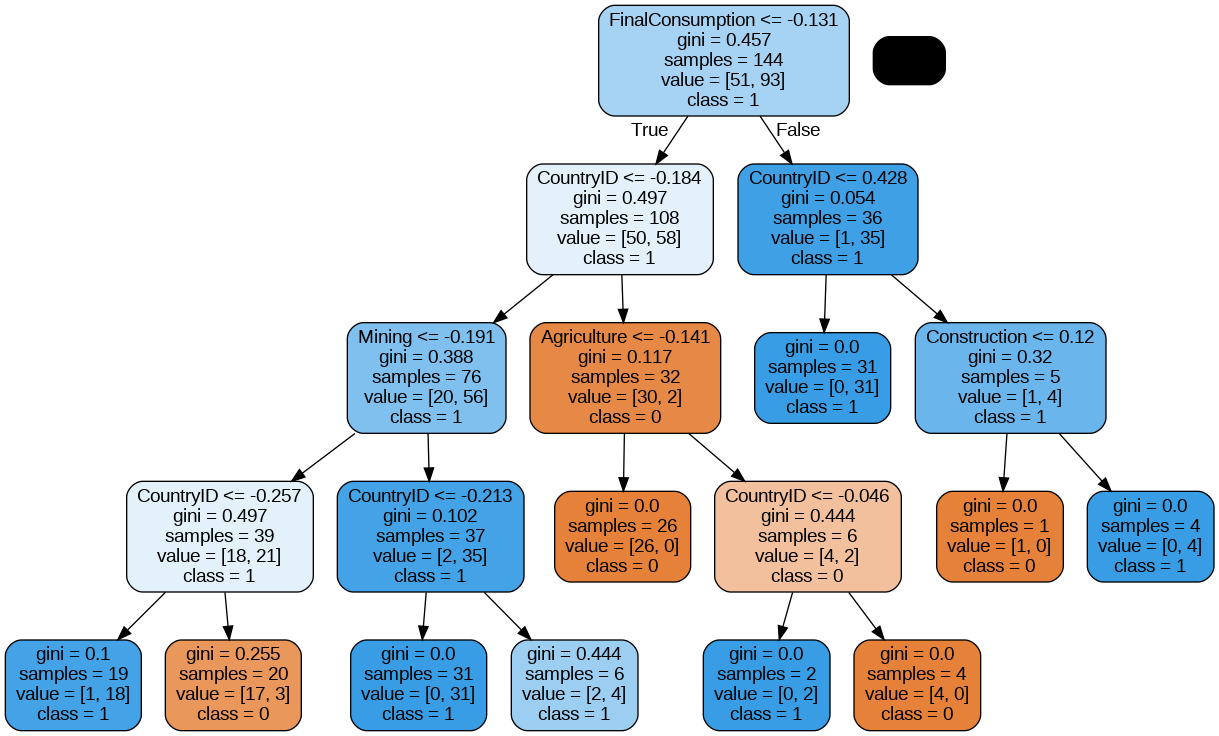

In [48]:


from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image

dot_data = StringIO()

# Convertir los valores únicos de la columna 'ingresos' a cadenas de caracteres
class_names = indices_tree['ingresos'].astype(str).unique()

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, class_names=class_names,
                feature_names=indices_tree.columns[:-2])

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())

#### <font color='#3d59c6'>  Conclusiones </font>

El modelo de clasificación supervisado de Decision Tree muestra unos buenos resultados para hacer clasificación binaria. No solo funciona muy bien cuando se le introducen todas las variables, sino que mejora aún más sus resultados a medida que se aumenta el nivel de profundidad del árbol. Tiene varios parámetros como la profundidad ya mencionada, o el número de ramas o el criterio. De esta forma, y combinando esos parámetros es posible encontrar buenos resultados para clasificación binaria.

Al igual que el modelo de regresión logística, es mejor clasificando aquellos países de ingresos altos.

También, el modelo nos permite conocer la importancia de cada variable para identificar así las más relevantes para el modelo. Observamos que a medida que aumenta la profundidad, más variables se vuelven relevantes para la clasificación.


### <font color='#3d59c6'>  Modelo de KNN </font>

#### <font color='#3d59c6'>  Variables </font>

Entendiendo que el método knn utiliza la comparación de distancias para clasificar, vamos a utilizar el mismo criterio de selección de variables que en el método de regresión logística. Para disminuir así el ruido y tener en principio un modelo de clasificación más preciso



In [49]:
# Seleccionar las variables de interés
variables_knn = [

    #'CountryID',
    'Population',
    'Agriculture',
     'Construction',
    'Exports',
     'FinalConsumption',
    'GovtConsumption',
     'GrossCapFormation',
     'GrossFixedCapFormation',
     'HouseholdConsumption',
    'Imports',
     'Manufacturing',
     'Mining',
     'OtherActivities',
    'TotalValueAdded',
     'Transport',
     'Wholesale',
     'GDP',
    'ingresos',

]

# Crear el nuevo Dataset con las variables seleccionadas
indices_knn = indices_scaled[variables_knn].copy()



#### <font color='#3d59c6'>  Entrenamiento </font>

In [50]:
y_knn = indices_knn['ingresos'] #target
indices_raw = indices_knn
indices_raw.drop(["ingresos"],axis=1, inplace=True)



In [51]:
# Dividir en train y test
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(indices_raw, y_knn, test_size=0.25, random_state=1234)

print("Tamaño dataset entrenamiento:", X_train_knn.shape)
print("Tamaño dataset validación:", X_test_knn.shape)


Tamaño dataset entrenamiento: (154, 17)
Tamaño dataset validación: (52, 17)


#### <font color='#3d59c6'>  Evaluación </font>

In [52]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# K values
k_values = [2, 4, 6]

# Saving results
precisions = []
confusion_matrices = []

# Cross validation w/ diff K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # 5-Fold Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(knn, X_train_knn, y_train_knn, cv=cv)

    # Confusion matrices
    cm = confusion_matrix(y_train_knn, y_pred)
    confusion_matrices.append(cm)

    # Precision
    precision = np.mean(y_pred == y_train_knn)
    precisions.append(precision)

# Print results
for k, precision, cm in zip(k_values, precisions, confusion_matrices):
    print(f"K-value: {k}")
    print("Accuracy:", precision)
    print("Confusion matrix:")
    print(cm)
    print()
    print(classification_report(y_train_knn, y_pred))  # <- Aquí puedes cambiar y_pred por y_train_knn si deseas el reporte para cada iteración de K
    print("="*50)


K-value: 2
Accuracy: 0.8701298701298701
Confusion matrix:
[[50  8]
 [12 84]]

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        58
           1       0.93      0.96      0.94        96

    accuracy                           0.93       154
   macro avg       0.93      0.92      0.92       154
weighted avg       0.93      0.93      0.93       154

K-value: 4
Accuracy: 0.8961038961038961
Confusion matrix:
[[51  7]
 [ 9 87]]

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        58
           1       0.93      0.96      0.94        96

    accuracy                           0.93       154
   macro avg       0.93      0.92      0.92       154
weighted avg       0.93      0.93      0.93       154

K-value: 6
Accuracy: 0.9285714285714286
Confusion matrix:
[[51  7]
 [ 4 92]]

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        58
   

#### <font color='#3d59c6'>  Conclusiones </font>

El método de distancias knn, ha resultado ser muy preciso en este caso para la clasificación de países, según sus ingresos per cápita. La iteración más optima parece ser con 4 neighbours, ya que con 6 se obtiene prácticamente los mismos resultados en la matriz de confusión. Una precisión de 90%. También, al igual que los otros modelos de clasificación utilizados, se observa que es mejor clasificando los paises de ingresos medioaltos en comparación con los de ingresos mediobajos.

Es importante reducir el número de variables de entrada, para disminuir el ruido. En este caso que se tienen 206 registros, el cálculo de distancias de las nuevas muestras con todas las disponibles no conlleva demasiado poder de cómputo. Así que la clasificación se hizo relativamente rápido.

Puede ser un buen método de clasificación, si se puede reducir las variables que traen ruido al modelo y si el número de muestras disponibles no es demasiado elevado.

* Note: Se hizo un análisis con todas las variables y se observó que el modelo no perdía precisión cuando se le añadían más variables. Puede que cuando el número de registros sea muy elevado, el modelo pierda precisión y se vuelva lento debido a la necesidad de computo.


## <font color='#3d59c6'> CONCLUSIONES </font>

Para poder hacer un Análisis de Clasificación supervisado se introduce una variable categórica que está directamente asociada al GNI per Cápita. El banco Mundial tiene umbrales en donde clasifica basado en el nivel de ingresos mensual per cápita. El Banco mundial hace 4 clasificaciones. Para poder hacer un análisis de regresión logística binomial, y para este ejemplo, se han tomado de esta forma:

*   Nivel de Ingresos Bajo [0]: GNI per cápita <3996
*   Nivel de Ingresos Alto[1]: GNI per cápita >3995

La nueva variable se añade al dataset con el nombre de "ingresos" y es de tipo booleano con 0 y 1 descrito anteriormente.

Se utilizaron 3 algoritmos de clasificación, para definir el nivel de ingresos descrito anteriormente. De los 3, se observa que son capaces de clasificar con gran precisión. El modelo de árboles de decisión parece ser el más apropiado. Tiene gran cantidad de parámetros ajustables para ajustar el modelo, y recibe varias variables sin que esto afecte notablemente el funcionamiento del modelo.

Cabe destacar que, debido a la cantidad de datos, no fue posible observar diferencias significativas en los recursos computacionales (traducidos a tiempo de ejecución del modelo).

Un mayor número de datos puede que afecte los resultados de los algoritmos. Por ejemplo, si se tuvieran más clases, el algoritmo de regresión logística tendría que ajustarse debido a su naturaleza binaria.

En general, con pocos datos y clases binarias, estos algoritmos han alcanzado resultados precisos.

## <font color='#3d59c6'>  CLASIFICACIÓN ADICIONAL </font>

### <font color='#3d59c6'>  Modelo de Decision Tree(Multiclase) </font>

#### <font color='#3d59c6'>  Introducción (Multiclase) </font>

Ahora, para ver el comportamiento del método Decision Tree multiclase, vamos a usar los umbrales de ingresos que utiliza el Banco Mundial. Esta vez, vamos a dejar los 4, ya que este modelo debería ser capaz de hacer clasificación multiclase.

*   Nivel de Ingresos Bajo [0]: GNI per cápita <1006
*   Nivel de Ingresos Mediano Bajo[1]: GNI per cápita 1005> y <3955
*   Nivel de Ingresos Medio-Alto [2]: GNI per cápita 3956> y <12235
*   Nivel de Ingresos Alto[3]: GNI per cápita >12235

En este caso vamos a tomar mas registros para ver como se comporta el modelo cuando tiene que hacer más restas. Así que se van a tomar los datos de 10 años. Del 2010 al 2019.

Cabe resaltar, que se toma para los umbrales un valor medio entre 2010 y 2019. Lo suyo sería que cada año tuviera los umbrales estipulados por el banco mundial.

#### <font color='#3d59c6'>  Limpieza de Datos </font>

In [53]:
global_indicators.columns

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [54]:

datos_optativo = global_indicators.copy()

# Eliminar las columnas especificadas
columnas_a_eliminar = [ ' AMA exchange rate ', ' IMF based exchange rate ', ' Currency ', ' Changes in inventories ',' Gross National Income(GNI) in USD ']
datos_optativo = datos_optativo.drop(columnas_a_eliminar, axis=1)


# Cambiar los nombres de las columnas a versiones más cortas
nuevos_nombres = {
    ' CountryID ': 'CountryID',
    ' Country ': 'Country',
    ' Year ': 'Year',
    ' Population ': 'Population',
    ' Per capita GNI ': 'pcGNI',
    ' Agriculture, hunting, forestry, fishing (ISIC A-B) ': 'Agriculture',
    ' Construction (ISIC F) ': 'Construction',
    ' Exports of goods and services ': 'Exports',
    ' Final consumption expenditure ': 'FinalConsumption',
    ' General government final consumption expenditure ': 'GovtConsumption',
    ' Gross capital formation ': 'GrossCapFormation',
    ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ': 'GrossFixedCapFormation',
    ' Household consumption expenditure (including Non-profit institutions serving households) ': 'HouseholdConsumption',
    ' Imports of goods and services ': 'Imports',
    ' Manufacturing (ISIC D) ': 'Manufacturing',
    ' Mining, Manufacturing, Utilities (ISIC C-E) ': 'Mining',
    ' Other Activities (ISIC J-P) ': 'OtherActivities',
    ' Total Value Added ': 'TotalValueAdded',
    ' Transport, storage and communication (ISIC I) ': 'Transport',
    ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ': 'Wholesale',
    ' Gross Domestic Product (GDP) ': 'GDP'

}

datos_optativo = datos_optativo.rename(columns=nuevos_nombres)

In [55]:
datos_optativo = datos_optativo[~datos_optativo['Country'].isin([' D.P.R. of Korea ', ' China, Macao SAR ', ' Sint Maarten (Dutch part) ', ' Monaco ',  ' Venezuela (Bolivarian Republic of) ', ' Tuvalu ' ])]


In [56]:
def categorizar_ingresos(gni_per_capita):
    if gni_per_capita < 1006:
        return 0  # Nivel de Ingresos Bajo
    elif 1005 < gni_per_capita < 3955:
        return 1  # Nivel de Ingresos Mediano Bajo
    elif 3956 < gni_per_capita < 12235:
        return 2  # Nivel de Ingresos Medio-Alto
    else:
        return 3  # Nivel de Ingresos Alto

datos_optativo['ingresos'] = datos_optativo['pcGNI'].apply(categorizar_ingresos)


In [57]:
datos_optativo = datos_optativo.drop('pcGNI',axis=1)

In [58]:
# Filtrar los datos desde 2010 hasta 2019
datos_filtrados_optativo = datos_optativo[(datos_optativo['Year'] >= 2010) & (datos_optativo['Year'] <= 2019)].copy()


In [59]:
indices_optativo = datos_filtrados_optativo.drop(['Country', 'Year'], axis=1).copy()

In [60]:
indices_optativo.isnull().sum()

CountryID                 0
Population                0
Agriculture               0
Construction              0
Exports                   0
FinalConsumption          0
GovtConsumption           0
GrossCapFormation         0
GrossFixedCapFormation    0
HouseholdConsumption      0
Imports                   0
Manufacturing             0
Mining                    0
OtherActivities           0
TotalValueAdded           0
Transport                 0
Wholesale                 0
GDP                       0
ingresos                  0
dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler

# Escalar todas las variables Excepto Country ID e ingresos
variables_escalar = indices_optativo.drop(columns=['CountryID', 'ingresos'])


scaler_optativo = StandardScaler()

# Aplica el escalado a las variables seleccionadas
indices_scaled_optativo = variables_escalar.apply(lambda x: scaler_optativo.fit_transform(x.values.reshape(-1, 1))[:, 0] if x.name not in ['CountryID', 'ingresos'] else x)

# Agrega las columnas 'countryID' e 'ingresos' al DataFrame escalado
indices_scaled_optativo[['CountryID', 'ingresos']] = indices_optativo[['CountryID', 'ingresos']]

indices_scaled_optativo.head()

,Population,Agriculture,Construction,Exports,FinalConsumption,GovtConsumption,GrossCapFormation,GrossFixedCapFormation,HouseholdConsumption,Imports,Manufacturing,Mining,OtherActivities,TotalValueAdded,Transport,Wholesale,GDP,CountryID,ingresos
40,-0.052383,-0.153898,-0.250252,-0.358211,-0.216325,-0.242897,-0.214245,-0.212348,-0.207678,-0.333718,-0.210530,-0.235264,-0.196648,-0.220675,-0.208774,-0.225943,-0.229450,4,0
41,-0.044670,-0.144903,-0.249925,-0.360218,-0.214566,-0.241108,-0.213928,-0.212022,-0.205940,-0.331562,-0.210028,-0.234372,-0.195164,-0.219015,-0.207484,-0.224663,-0.227757,4,0
42,-0.035808,-0.140787,-0.249635,-0.360357,-0.214040,-0.239627,-0.213474,-0.211557,-0.205667,-0.327381,-0.210159,-0.234377,-0.194435,-0.218046,-0.205534,-0.223075,-0.226617,4,0
43,-0.027984,-0.140708,-0.249695,-0.358995,-0.214273,-0.239013,-0.213346,-0.211426,-0.206119,-0.327312,-0.210677,-0.234789,-0.194076,-0.217835,-0.204654,-0.222795,-0.226307,4,0
44,-0.019430,-0.142101,-0.249504,-0.357918,-0.214306,-0.237777,-0.213265,-0.211342,-0.206484,-0.329557,-0.210962,-0.234957,-0.193273,-0.217669,-0.205886,-0.223006,-0.226353,4,0


In [62]:
# Resumen de la variable objetivo "ingresos"
class_summary_opt = indices_scaled_optativo['ingresos'].value_counts(normalize=True) * 100
print(class_summary_opt)

3    34.302326
2    26.647287
1    26.114341
0    12.936047
Name: ingresos, dtype: float64


In [63]:
n = indices_scaled_optativo['ingresos'].count()
n

2064

#### <font color='#3d59c6'>  Variables </font>

In [77]:
# Seleccionar las variables de interés
variables_tree_opt = [

     'CountryID',
     'Population',
    'Agriculture',
    'Construction',
    'Exports',
    'FinalConsumption',
     'GovtConsumption',
    'GrossCapFormation',
    'GrossFixedCapFormation',
    'HouseholdConsumption',
    'Imports',
    'Manufacturing',
    'Mining',
    'OtherActivities',
    'TotalValueAdded',
    'Transport',
    'Wholesale',
    'GDP',
    'ingresos'

]

# Crear el nuevo Dataset con las variables seleccionadas
indices_tree_opt = indices_scaled_optativo[variables_tree_opt].copy()

#### <font color='#3d59c6'>  Entrenamiento </font>

In [78]:
X_tree_opt = indices_tree_opt.drop(['ingresos', 'CountryID'], axis=1)
y_tree_opt = indices_tree_opt['ingresos'].values


In [79]:
# Dividir en train y test
X_train_tree_opt, X_test_tree_opt, y_train_tree_opt, y_test_tree_opt = train_test_split(X_tree_opt,y_tree_opt,test_size=0.3,random_state=0)

In [80]:
#Creacion del modelo
tree_opt = DecisionTreeClassifier(max_depth=4, random_state = 0,max_leaf_nodes=50, min_samples_split=2, criterion='gini')

In [81]:
#Entrenamiento
tree_opt.fit(X_train_tree_opt, y_train_tree_opt)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, random_state=0)

In [82]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree_opt = tree_opt.predict(X_train_tree_opt)
y_test_pred_tree_opt = tree_opt.predict(X_test_tree_opt)

In [83]:
y_train_pred_tree_opt

array([1, 1, 3, ..., 0, 2, 2])

#### <font color='#3d59c6'>  Evaluación </font>

In [84]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree_opt = accuracy_score(y_train_tree_opt, y_train_pred_tree_opt)

#Calculo el accuracy en Test
test_accuracy_tree_opt = accuracy_score(y_test_tree_opt, y_test_pred_tree_opt)

print('El accuracy en train es:', train_accuracy_tree_opt)
print('El accuracy en test es:', test_accuracy_tree_opt)

El accuracy en train es: 0.7098337950138505
El accuracy en test es: 0.65



Test Set:
Accuracy: 0.65

Confusion Matrix:


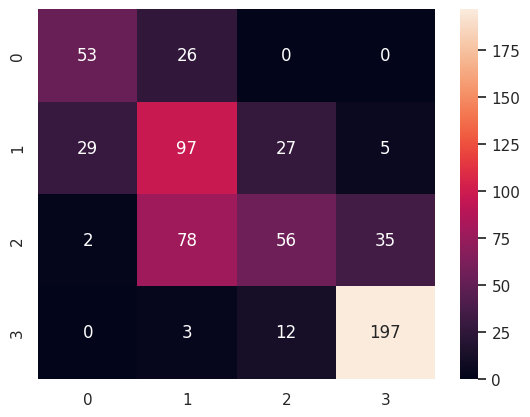


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        79
           1       0.48      0.61      0.54       158
           2       0.59      0.33      0.42       171
           3       0.83      0.93      0.88       212

    accuracy                           0.65       620
   macro avg       0.63      0.64      0.62       620
weighted avg       0.65      0.65      0.64       620



In [86]:


# Evaluate the model

accuracy_test_tree_opt = accuracy_score(y_test_tree_opt, y_test_pred_tree_opt)

conf_matrix_test_tree_opt = confusion_matrix(y_test_tree_opt, y_test_pred_tree_opt)

classification_rep_test_tree_opt = classification_report(y_test_tree_opt, y_test_pred_tree_opt)

# Print the results


print("\nTest Set:")
print(f"Accuracy: {accuracy_test_tree_opt:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix_test_tree_opt, annot=True, fmt='d')
plt.show()
print("\nClassification Report:")
print(classification_rep_test_tree_opt)

#### <font color='#3d59c6'>  Conclusiones </font>

Se observa que el metodo de clasificación de Decision Tree, da cierto nivel de aproximación de las clases. Observando la matriz de confusión, se ve que tiene mejor resultado entre umbrales alejados, pero aquellos que son medios, aun puede mejorar. Se debe usar otros métodos de optimización como Gridsearch, Randomsearch o Bayes para incrementar la exactitud del modelo de clasificación multiclase